Datasource: 
- https://corona.lmao.ninja/
- https://corona.lmao.ninja/v3/covid-19/jhucsse
- https://github.com/disease-sh/api

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

%matplotlib inline

In [2]:
url = 'https://corona.lmao.ninja/v3/covid-19/jhucsse'
r = requests.get(url)
j = r.json()
j[:3]

[{'country': 'Afghanistan',
  'county': None,
  'updatedAt': '2021-09-01 04:21:38',
  'stats': {'confirmed': 153220, 'deaths': 7118, 'recovered': None},
  'coordinates': {'latitude': '33.93911', 'longitude': '67.709953'},
  'province': None},
 {'country': 'Albania',
  'county': None,
  'updatedAt': '2021-09-01 04:21:38',
  'stats': {'confirmed': 146387, 'deaths': 2498, 'recovered': None},
  'coordinates': {'latitude': '41.1533', 'longitude': '20.1683'},
  'province': None},
 {'country': 'Algeria',
  'county': None,
  'updatedAt': '2021-09-01 04:21:38',
  'stats': {'confirmed': 196080, 'deaths': 5269, 'recovered': None},
  'coordinates': {'latitude': '28.0339', 'longitude': '1.6596'},
  'province': None}]

In [3]:
type(j)

list

In [4]:
df = pd.DataFrame(j)
df

,country,county,updatedAt,stats,coordinates,province
0,Afghanistan,None,2021-09-01 04:21:38,"{'confirmed': 153220, 'deaths': 7118, 'recover...","{'latitude': '33.93911', 'longitude': '67.7099...",None
1,Albania,None,2021-09-01 04:21:38,"{'confirmed': 146387, 'deaths': 2498, 'recover...","{'latitude': '41.1533', 'longitude': '20.1683'}",None
2,Algeria,None,2021-09-01 04:21:38,"{'confirmed': 196080, 'deaths': 5269, 'recover...","{'latitude': '28.0339', 'longitude': '1.6596'}",None
3,Andorra,None,2021-09-01 04:21:38,"{'confirmed': 15033, 'deaths': 130, 'recovered...","{'latitude': '42.5063', 'longitude': '1.5218'}",None
4,Angola,None,2021-09-01 04:21:38,"{'confirmed': 47544, 'deaths': 1217, 'recovere...","{'latitude': '-11.2027', 'longitude': '17.8739'}",None
...,...,...,...,...,...,...
763,US,Accomack,2021-09-01 04:21:38,"{'confirmed': 766435, 'deaths': 11842, 'recove...","{'latitude': '37.76707161', 'longitude': '-75....",Virginia
764,US,Adams,2021-09-01 04:21:38,"{'confirmed': 563041, 'deaths': 6574, 'recover...","{'latitude': '46.98299757', 'longitude': '-118...",Washington
765,US,Barbour,2021-09-01 04:21:38,"{'confirmed': 189690, 'deaths': 3084, 'recover...","{'latitude': '39.1307219', 'longitude': '-80.0...",West Virginia
766,US,Adams,2021-09-01 04:21:38,"{'confirmed': 733940, 'deaths': 8462, 'recover...","{'latitude': '43.96974651', 'longitude': '-89....",Wisconsin


# Split stats (dictionary column) into seperate columns

In [5]:
# dstats = df['stats'].apply(pd.Series)
dstats = pd.json_normalize(df.stats)
dstats

,confirmed,deaths,recovered
0,153220,7118,NaN
1,146387,2498,NaN
2,196080,5269,NaN
3,15033,130,NaN
4,47544,1217,NaN
...,...,...,...
763,766435,11842,0.0
764,563041,6574,0.0
765,189690,3084,0.0
766,733940,8462,0.0


In [6]:
# dcoor = df['coordinates'].apply(pd.Series)
dcoor = pd.json_normalize(df.coordinates)
dcoor

,latitude,longitude
0,33.93911,67.709953
1,41.1533,20.1683
2,28.0339,1.6596
3,42.5063,1.5218
4,-11.2027,17.8739
...,...,...
763,37.76707161,-75.63234615
764,46.98299757,-118.56017340000001
765,39.1307219,-80.00350858
766,43.96974651,-89.76782777


In [7]:
df

,country,county,updatedAt,stats,coordinates,province
0,Afghanistan,None,2021-09-01 04:21:38,"{'confirmed': 153220, 'deaths': 7118, 'recover...","{'latitude': '33.93911', 'longitude': '67.7099...",None
1,Albania,None,2021-09-01 04:21:38,"{'confirmed': 146387, 'deaths': 2498, 'recover...","{'latitude': '41.1533', 'longitude': '20.1683'}",None
2,Algeria,None,2021-09-01 04:21:38,"{'confirmed': 196080, 'deaths': 5269, 'recover...","{'latitude': '28.0339', 'longitude': '1.6596'}",None
3,Andorra,None,2021-09-01 04:21:38,"{'confirmed': 15033, 'deaths': 130, 'recovered...","{'latitude': '42.5063', 'longitude': '1.5218'}",None
4,Angola,None,2021-09-01 04:21:38,"{'confirmed': 47544, 'deaths': 1217, 'recovere...","{'latitude': '-11.2027', 'longitude': '17.8739'}",None
...,...,...,...,...,...,...
763,US,Accomack,2021-09-01 04:21:38,"{'confirmed': 766435, 'deaths': 11842, 'recove...","{'latitude': '37.76707161', 'longitude': '-75....",Virginia
764,US,Adams,2021-09-01 04:21:38,"{'confirmed': 563041, 'deaths': 6574, 'recover...","{'latitude': '46.98299757', 'longitude': '-118...",Washington
765,US,Barbour,2021-09-01 04:21:38,"{'confirmed': 189690, 'deaths': 3084, 'recover...","{'latitude': '39.1307219', 'longitude': '-80.0...",West Virginia
766,US,Adams,2021-09-01 04:21:38,"{'confirmed': 733940, 'deaths': 8462, 'recover...","{'latitude': '43.96974651', 'longitude': '-89....",Wisconsin


In [8]:
df.columns

Index(['country', 'county', 'updatedAt', 'stats', 'coordinates', 'province'], dtype='object')

In [9]:
ds = pd.concat([df[['country', 'province', 'updatedAt']], dstats, dcoor], axis=1)
ds

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
0,Afghanistan,None,2021-09-01 04:21:38,153220,7118,NaN,33.93911,67.709953
1,Albania,None,2021-09-01 04:21:38,146387,2498,NaN,41.1533,20.1683
2,Algeria,None,2021-09-01 04:21:38,196080,5269,NaN,28.0339,1.6596
3,Andorra,None,2021-09-01 04:21:38,15033,130,NaN,42.5063,1.5218
4,Angola,None,2021-09-01 04:21:38,47544,1217,NaN,-11.2027,17.8739
...,...,...,...,...,...,...,...,...
763,US,Virginia,2021-09-01 04:21:38,766435,11842,0.0,37.76707161,-75.63234615
764,US,Washington,2021-09-01 04:21:38,563041,6574,0.0,46.98299757,-118.56017340000001
765,US,West Virginia,2021-09-01 04:21:38,189690,3084,0.0,39.1307219,-80.00350858
766,US,Wisconsin,2021-09-01 04:21:38,733940,8462,0.0,43.96974651,-89.76782777


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    768 non-null    object 
 1   province   594 non-null    object 
 2   updatedAt  768 non-null    object 
 3   confirmed  768 non-null    int64  
 4   deaths     768 non-null    int64  
 5   recovered  51 non-null     float64
 6   latitude   768 non-null    object 
 7   longitude  768 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 48.1+ KB


In [11]:
ds['updatedAt'] = ds['updatedAt'].astype('datetime64')

In [12]:
ds.columns

Index(['country', 'province', 'updatedAt', 'confirmed', 'deaths', 'recovered',
       'latitude', 'longitude'],
      dtype='object')

In [13]:
cols = ['confirmed', 'deaths', 'recovered','latitude', 'longitude']
ds[cols] = ds[cols].apply(pd.to_numeric, errors='coerce')

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    768 non-null    object        
 1   province   594 non-null    object        
 2   updatedAt  768 non-null    datetime64[ns]
 3   confirmed  768 non-null    int64         
 4   deaths     768 non-null    int64         
 5   recovered  51 non-null     float64       
 6   latitude   747 non-null    float64       
 7   longitude  747 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 48.1+ KB


In [15]:
ds

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
0,Afghanistan,None,2021-09-01 04:21:38,153220,7118,NaN,33.939110,67.709953
1,Albania,None,2021-09-01 04:21:38,146387,2498,NaN,41.153300,20.168300
2,Algeria,None,2021-09-01 04:21:38,196080,5269,NaN,28.033900,1.659600
3,Andorra,None,2021-09-01 04:21:38,15033,130,NaN,42.506300,1.521800
4,Angola,None,2021-09-01 04:21:38,47544,1217,NaN,-11.202700,17.873900
...,...,...,...,...,...,...,...,...
763,US,Virginia,2021-09-01 04:21:38,766435,11842,0.0,37.767072,-75.632346
764,US,Washington,2021-09-01 04:21:38,563041,6574,0.0,46.982998,-118.560173
765,US,West Virginia,2021-09-01 04:21:38,189690,3084,0.0,39.130722,-80.003509
766,US,Wisconsin,2021-09-01 04:21:38,733940,8462,0.0,43.969747,-89.767828


In [16]:
ds.confirmed.sum()

217707620

In [17]:
ds[ds['country']=='Thailand']

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
650,Thailand,None,2021-09-01 04:21:38,1204729,11589,NaN,15.870032,100.992541


In [18]:
ds[['confirmed', 'deaths', 'recovered']].sum()

confirmed    217707620.0
deaths         4519157.0
recovered            0.0
dtype: float64

In [19]:
ds[['country', 'confirmed', 'deaths', 'recovered']].groupby('country').sum()

,confirmed,deaths,recovered
country,,,
Afghanistan,153220,7118,0.0
Albania,146387,2498,0.0
Algeria,196080,5269,0.0
Andorra,15033,130,0.0
Angola,47544,1217,0.0
...,...,...,...
Vietnam,462096,11064,0.0
West Bank and Gaza,342282,3680,0.0
Yemen,7869,1472,0.0


In [20]:
dq = ds[ds['country'].str.contains('Thailand|Malaysia|Singapore|Indonesia|Cambodia')]
dq

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
74,Cambodia,None,2021-09-01 04:21:38,93055,1903,NaN,11.550000,104.916700
286,Indonesia,None,2021-09-01 04:21:38,4089801,133023,NaN,-0.789300,113.921300
382,Malaysia,None,2021-09-01 04:21:38,1746254,16664,NaN,4.210484,101.975766
593,Singapore,None,2021-09-01 04:21:38,67620,55,NaN,1.283300,103.833300
650,Thailand,None,2021-09-01 04:21:38,1204729,11589,NaN,15.870032,100.992541


<AxesSubplot:xlabel='country', ylabel='confirmed'>

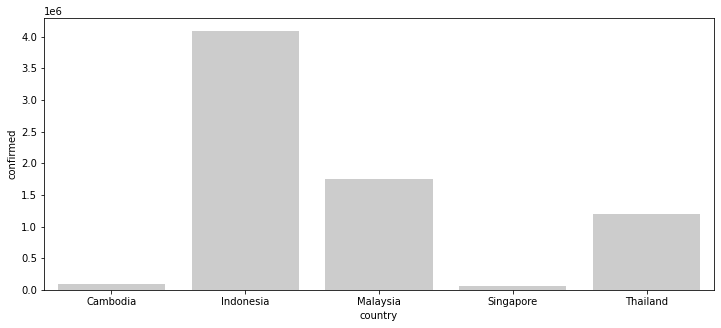

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(data=dq, x='country', y='confirmed', color='.8')

In [22]:
colors = ['.8' if c != 'Thailand' else 'salmon' for c in dq['country']]
colors

['.8', '.8', '.8', '.8', 'salmon']

In [23]:
str(ds.loc[0, 'updatedAt'])

'2021-09-01 04:21:38'

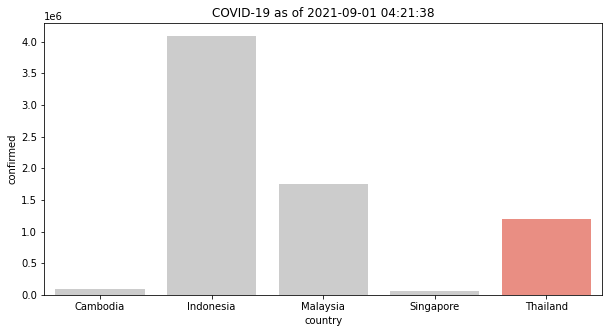

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=dq, x='country', y='confirmed', palette=colors)
plt.title(f"COVID-19 as of {str(ds.loc[0, 'updatedAt'])}");